## A notebook to create a bar graph of CTs inside AS

## Install and import libraries

In [42]:
%pip install pandas seaborn numpy requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from  io import StringIO

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\abueckle\documents\github\hra-cell-type-populations-supporting-information\.venv\lib\site-packages (2.2.2)




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Global settings

In [43]:
hra_pop_version = 'v0.12.0'
branch = 'v0.12.0'

output_folder = 'output/ctBar3dAs'

# adjust vis
# plt.rcParams['figure.figsize'] = (10, 2.5)

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 20,    # Font size for plot titles
    "axes.labelsize": 13,    # Font size for x and y labels
    "xtick.labelsize": 12,   # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
    "legend.fontsize": 13,
    "legend.title_fontsize": 15
})

## Load data

In [44]:
# Use new report: https://github.com/x-atlas-consortia/hra-pop/issues/125!!!!!!!!!!!
url = f"https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-in-anatomical-structurescts-per-as.csv"

headers = {
  'Accept' :'text/csv'
  }

data = requests.get(url=url, headers=headers).text
df = pd.read_csv(StringIO(data))

df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002079,ductal,15.312,0.522523,1
1,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002064,acinar,8.640,0.294840,1
2,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000115,endothelial,3.864,0.131859,1
3,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000738,immune,1.464,0.049959,1
4,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002410,activated_stellate,0.024,0.000819,1
...,...,...,...,...,...,...,...,...,...,...,...
6550,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1
6551,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1
6552,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
6553,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


## Preprocess (use look-up)

In [45]:
# walk up CTs
# Use new report: https://github.com/x-atlas-consortia/hra-pop/issues/125!!!!!!!!!!!

csv_response = requests.get(
    f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-level-mapping.csv', headers={'accept': 'text/csv'}).text

look_up = pd.read_csv(StringIO(csv_response))

look_up

,cell_label,cell_id,level_1_cell_id,level_1_cell_label
0,cell,http://purl.obolibrary.org/obo/CL_0000000,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
1,hematopoietic stem cell,http://purl.obolibrary.org/obo/CL_0000037,http://purl.obolibrary.org/obo/CL_0000034,stem cell
2,fibroblast,http://purl.obolibrary.org/obo/CL_0000057,http://purl.obolibrary.org/obo/CL_0000057,fibroblast
3,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
4,blood vessel endothelial cell,http://purl.obolibrary.org/obo/CL_0000071,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
...,...,...,...,...
197,CCL3-positive alveolar macrophage,http://purl.obolibrary.org/obo/CL_4033041,http://purl.obolibrary.org/obo/CL_0000235,macrophage
198,metallothionein-positive alveolar macrophage,http://purl.obolibrary.org/obo/CL_4033042,http://purl.obolibrary.org/obo/CL_0000235,macrophage
199,lung interstitial macrophage,http://purl.obolibrary.org/obo/CL_4033043,http://purl.obolibrary.org/obo/CL_0000235,macrophage
200,deuterosomal cell,http://purl.obolibrary.org/obo/CL_4033044,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell


In [46]:
df_temp = df
df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002079,ductal,15.312,0.522523,1
1,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002064,acinar,8.640,0.294840,1
2,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000115,endothelial,3.864,0.131859,1
3,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000738,immune,1.464,0.049959,1
4,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002410,activated_stellate,0.024,0.000819,1
...,...,...,...,...,...,...,...,...,...,...,...
6550,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1
6551,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1
6552,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
6553,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


In [47]:
# Merge look-up df with df
df_temp = df.merge(
    look_up[['cell_id','level_1_cell_id','level_1_cell_label']],
    left_on='cell_id',  # Column in main df
    right_on='cell_id',  # Column in lookup df
    how='left'      # Keep all rows from main df
)

# handle missing values
df_temp['level_1_cell_id'] = df_temp['level_1_cell_id'].fillna('unknown cell')
df_temp['level_1_cell_label'] = df_temp['level_1_cell_label'].fillna('unknown cell')

df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002079,ductal,15.312,0.522523,1,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002064,acinar,8.640,0.294840,1,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
2,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002064,acinar,8.640,0.294840,1,http://purl.obolibrary.org/obo/CL_0000152,exocrine cell
3,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000115,endothelial,3.864,0.131859,1,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
4,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000738,immune,1.464,0.049959,1,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1,unknown cell,unknown cell
6695,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,http://purl.obolibrary.org/obo/CL_0000084,T cell
6696,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,unknown cell,unknown cell
6697,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,unknown cell,unknown cell


In [48]:
df = df_temp

df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002079,ductal,15.312,0.522523,1,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002064,acinar,8.640,0.294840,1,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
2,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002064,acinar,8.640,0.294840,1,http://purl.obolibrary.org/obo/CL_0000152,exocrine cell
3,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000115,endothelial,3.864,0.131859,1,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
4,pancreas,http://purl.obolibrary.org/obo/UBERON_0001069,head of pancreas,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000738,immune,1.464,0.049959,1,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1,unknown cell,unknown cell
6695,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,http://purl.obolibrary.org/obo/CL_0000084,T cell
6696,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,unknown cell,unknown cell
6697,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,unknown cell,unknown cell


In [49]:
# filter by tool (azimuth, then celltypist, then popv)
# Function to determine if a row should be kept based on conditions
def filter_rows(df):
    # Step 1: Group by `sex`, `as_label`, and `modality`
    groups = df.groupby(['organ','sex', 'as_label', 'modality'])

    # Step 2: Initialize a list to store the rows to keep
    rows_to_keep = []

    # Step 3: Loop through each group
    for _, group in groups:      
        # If 'azimuth' exists in the group, keep only those rows
        if 'azimuth' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'azimuth'])
        # If no 'azimuth' but 'cell_typist' exists, keep 'cell_typist'
        elif 'celltypist' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'celltypist'])
        # If neither 'azimuth' nor 'cell_typist' exist, keep 'popv'
        elif 'popv' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'popv'])

    # Combine all the rows to keep
    df_filtered = pd.concat(rows_to_keep)
    return df_filtered


# Apply the filtering function
no_proteomics = df[df['tool'] != 'sc_proteomics']
df_filtered = filter_rows(no_proteomics)

# Display the filtered DataFrame
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
1198,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,10748.474,0.216025,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1200,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030016,Distal Convoluted Tubule Type 1,6735.132,0.135364,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1202,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001108,Medullary Thick Ascending Limb,3580.251,0.071957,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1204,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,3390.010,0.068133,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1206,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001107,Ascending Thin Limb,3128.057,0.062868,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,57.353,0.001771,4,http://purl.obolibrary.org/obo/CL_0000084,T cell
4328,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,48.246,0.001490,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
4329,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,31.500,0.000973,4,http://purl.obolibrary.org/obo/CL_0000084,T cell
4330,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,23.044,0.000712,4,http://purl.obolibrary.org/obo/CL_0000236,B cell


## Visualize (single vis)

In [50]:
# create new labels with organ and as_label so y-axis is sorted and grouped by organ
df_filtered['organ_as_label'] = df_filtered['organ']+" - "+df_filtered['as_label']
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label,organ_as_label
1198,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,10748.474,0.216025,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1200,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030016,Distal Convoluted Tubule Type 1,6735.132,0.135364,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1202,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001108,Medullary Thick Ascending Limb,3580.251,0.071957,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1204,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,3390.010,0.068133,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1206,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001107,Ascending Thin Limb,3128.057,0.062868,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,57.353,0.001771,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder - trigone of urinary bladder
4328,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,48.246,0.001490,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell,urinary bladder - trigone of urinary bladder
4329,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,31.500,0.000973,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder - trigone of urinary bladder
4330,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,23.044,0.000712,4,http://purl.obolibrary.org/obo/CL_0000236,B cell,urinary bladder - trigone of urinary bladder


In [51]:
# read colors made from Color Brewer
custom_palette = []
with open('data/colors.txt', 'r') as f:
    custom_palette = [line.strip() for line in f.readlines()]

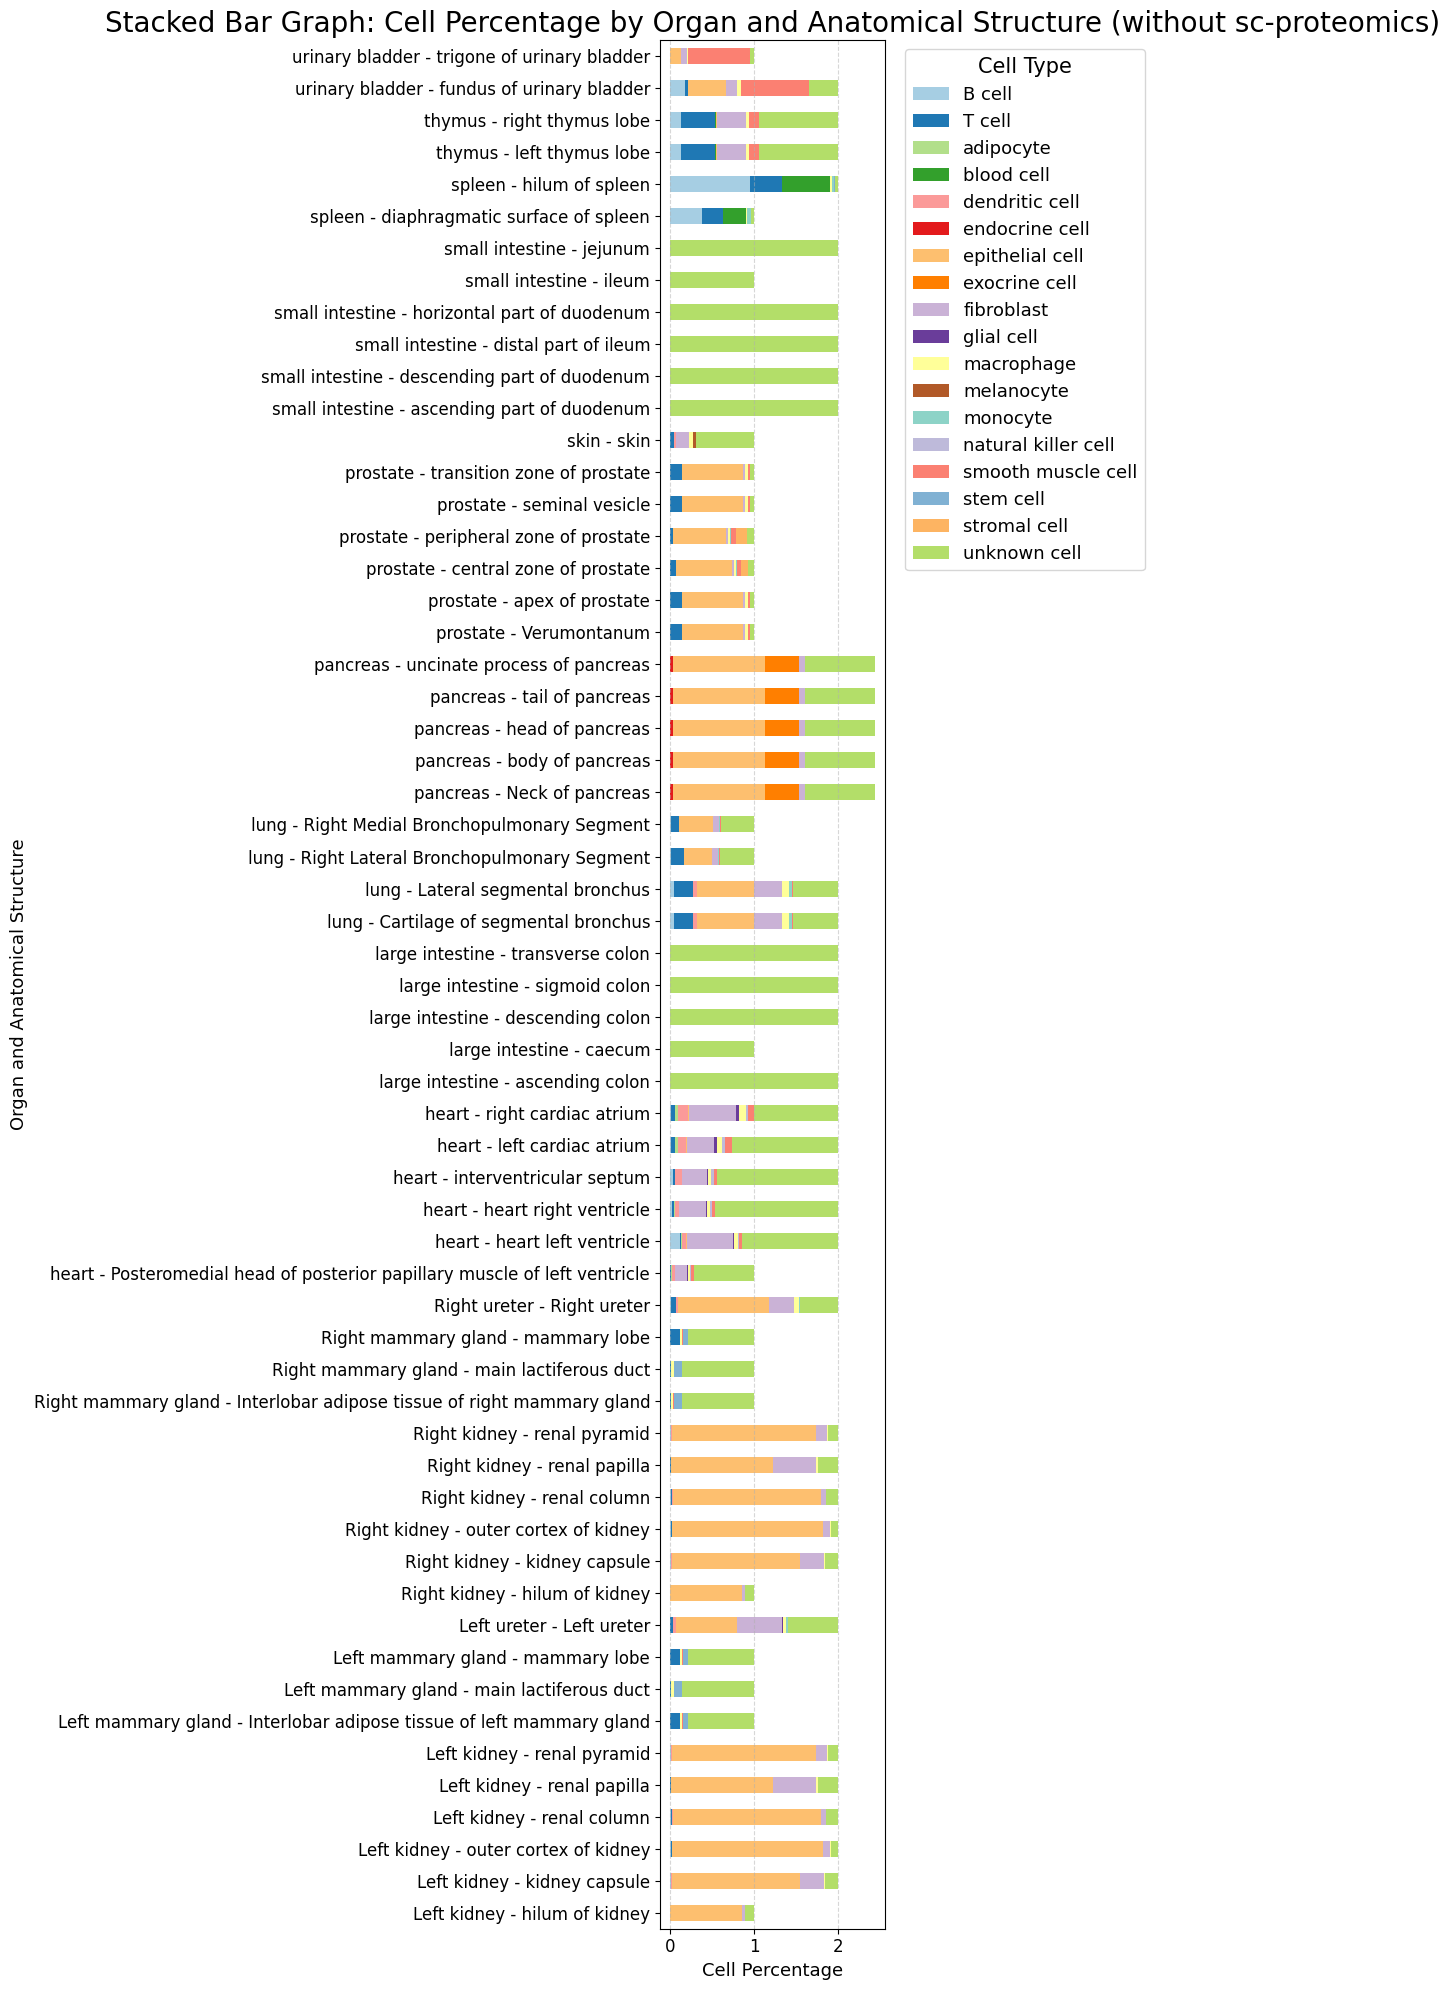

In [52]:
# Group by as_label, level_1_cell_label, and tool, summing the cell percentages
grouped = df_filtered.groupby(['organ_as_label', 'level_1_cell_label'])['cell_percentage'].sum().reset_index()

# Combine level_1_cell_label and tool into one label for stacked bars
grouped['stack_label'] = grouped['level_1_cell_label'] 

# Pivot the data so each row is an as_label and each column is a stack_label
pivot_df = grouped.pivot(
    index='organ_as_label', columns='stack_label', values='cell_percentage').fillna(0)

# Plot the stacked bar chart
ax = pivot_df.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 20),
    color=custom_palette  # Using the custom palette
)

# Styling the plot
plt.xlabel("Cell Percentage")
plt.ylabel("Organ and Anatomical Structure")
plt.title("Stacked Bar Graph: Cell Percentage by Organ and Anatomical Structure (without sc-proteomics)")
plt.legend(title="Cell Type",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Save the figure at 600 DPI
plt.savefig("output/stacked_bar_graph.png", dpi=600,
            format='png', bbox_inches='tight')

plt.show()

## Make look-up for `as_label` to `node_name`

In [53]:
url = 'https://cdn.humanatlas.io/digital-objects/ref-organ/asct-b-3d-models-crosswalk/v1.7/assets/asct-b-3d-models-crosswalk.csv'
df_crosswalk = pd.read_csv(url, skiprows=10)
df_crosswalk

,anatomical_structure_of,source_spatial_entity,node_name,label,OntologyID,representation_of,node_type,glb file of single organs,Ref/1,Ref/1/ID
0,-,#VHFemaleOrgans,VH_F_integumentary_system,integumentary system layer,UBERON:0013754,http://purl.obolibrary.org/obo/UBERON_0013754,organizational,3d-vh-f-united,NaN,NaN
1,#VHFSkinV1.1,#VHFemaleOrgans,VH_F_skin,skin of body,UBERON:0002097,http://purl.obolibrary.org/obo/UBERON_0002097,mesh,3d-vh-f-skin,NaN,NaN
2,-,-,VH_F_mammary_gland,-,-,-,organizational,-,NaN,NaN
3,#VHFLeftMammaryGland,#VHFemaleOrgans,VH_F_mammary_gland_L,Left mammary gland,FMA:57991,http://purl.org/sig/ont/fma/fma57991,organizational,3d-vh-f-mammary-gland-l,NaN,NaN
4,#VHFLeftMammaryGland,#VHFemaleOrgans,VH_F_fat_L,Interlobar adipose tissue of left mammary gland,FMA:73166,http://purl.org/sig/ont/fma/fma73166,mesh,3d-vh-f-mammary-gland-l,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2108,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_1,lumbar vertebra 1,UBERON:0004617,http://purl.obolibrary.org/obo/UBERON_0004617,mesh,VH_M_Vertebrae,NaN,NaN
2109,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_2,lumbar vertebra 2,UBERON:0004618,http://purl.obolibrary.org/obo/UBERON_0004618,mesh,VH_M_Vertebrae,NaN,NaN
2110,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_3,lumbar vertebra 3,UBERON:0004619,http://purl.obolibrary.org/obo/UBERON_0004619,mesh,VH_M_Vertebrae,NaN,NaN
2111,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_4,lumbar vertebra 4,UBERON:0004620,http://purl.obolibrary.org/obo/UBERON_0004620,mesh,VH_M_Vertebrae,NaN,NaN


In [54]:
# only keep relevant rows
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label,organ_as_label
1198,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,10748.474,0.216025,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1200,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030016,Distal Convoluted Tubule Type 1,6735.132,0.135364,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1202,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001108,Medullary Thick Ascending Limb,3580.251,0.071957,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1204,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,3390.010,0.068133,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
1206,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001107,Ascending Thin Limb,3128.057,0.062868,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,57.353,0.001771,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder - trigone of urinary bladder
4328,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,48.246,0.001490,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell,urinary bladder - trigone of urinary bladder
4329,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,31.500,0.000973,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder - trigone of urinary bladder
4330,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,23.044,0.000712,4,http://purl.obolibrary.org/obo/CL_0000236,B cell,urinary bladder - trigone of urinary bladder


In [55]:
# export relevant columns
subset = df_crosswalk[['label', 'node_name', 'anatomical_structure_of']]
export = subset[subset['label'].isin(df_filtered['as_label'])]
export.to_csv('output/ctBar3dAs/crosswalk.csv', index=False)